In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [27]:
# a) Read the data with pandas and find features and target variables
df = pd.read_csv('breast_cancer_survival.csv')

In [28]:
# Handle categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

features = df.drop('Patient_Status', axis=1)
target = df['Patient_Status']


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
# b) Train Random Forest, and Adaboost
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [31]:
# c) And find accuracy, precision, recall, f1-score
for clf, name in zip([rf, ada], ['Random Forest', 'AdaBoost']):
    y_pred = clf.predict(X_test)
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='micro')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='micro')}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='micro')}\n")

Random Forest Results:
Accuracy: 0.8208955223880597
Precision: 0.8208955223880597
Recall: 0.8208955223880597
F1-Score: 0.8208955223880597

AdaBoost Results:
Accuracy: 0.8208955223880597
Precision: 0.8208955223880597
Recall: 0.8208955223880597
F1-Score: 0.8208955223880597



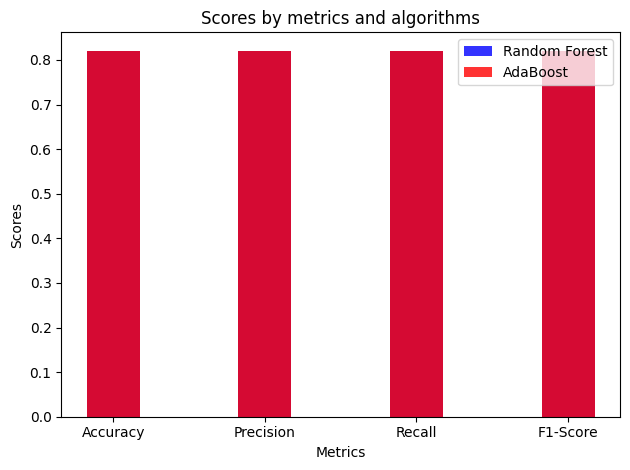

In [32]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define the results for Random Forest and AdaBoost
random_forest_results = [0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597]
adaboost_results = [0.8208955223880597, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Set the opacity
opacity = 0.8

# Plot the results for Random Forest
rects1 = plt.bar(metrics, random_forest_results, bar_width,
alpha=opacity,
color='b',
label='Random Forest')

# Plot the results for AdaBoost
rects2 = plt.bar(metrics, adaboost_results, bar_width,
alpha=opacity,
color='r',
label='AdaBoost')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Scores by metrics and algorithms')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

